In [3]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving ba.jpg to ba (1).jpg


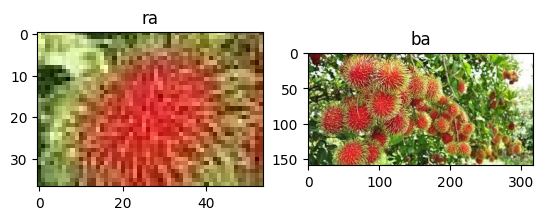

In [4]:
# tampilkan kedua gambar
import cv2
from matplotlib import pyplot as plt
# panggil dan konversi warna agar sesuai dengan Matplotlib
ra = cv2.imread('ra.jpeg')
ra = cv2.cvtColor(ra, cv2.COLOR_BGR2RGB)
# panggil dan konversi warna agar sesuai dengan Matplotlib
ba = cv2.imread('ba.jpg')
ba = cv2.cvtColor(ba, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(ra), plt.title('ra')
plt.subplot(122),plt.imshow(ba), plt.title('ba')
plt.show()

Jumlah objek ditemukan  10


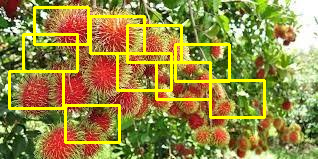

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## membaca gambar utuh untuk dicari
img_rgb = cv2.imread('ba.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
## membaca template
template = cv2.imread('ra.jpeg',0)
## ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]
# menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)
## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint=[]
lspoint2=[]
count = 0 # untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
## jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
## gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
        for i in range(((pt[0])-9), ((pt[0])+9),1):
        ## tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(((pt[1])-9), ((pt[1])+9),1):
        ## tambahkan koordinat y ke list
            lspoint2.append(k)
        count+=1 ### berapa jumlah matching yang ditemukan?
    else:
        continue
print ("Jumlah objek ditemukan ", count)
## tampilkan dengan imshow
cv2_imshow(img_rgb)